## BloomTech Data Science

---


# Logistic Regression
- scikit-learn pipelines
- train/validaiton/test split
- Baseline for classificaiton
- Logistic Regression




In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Libraries for today's project
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# I. Wrangle Data

In [2]:
def wrangle(filepath):
  df = pd.read_csv(filepath, index_col='PassengerId')
  df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
  df['Pclass'] = df['Pclass'].astype('object')
  return df

df = wrangle(DATA_PATH+'titanic/train.csv')
X_test = wrangle(DATA_PATH+'titanic/test.csv')

In [3]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [4]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [5]:
df.shape, X_test.shape

((891, 8), (418, 7))

## II. Split Data

In [7]:
# Split Target Vector from our Feature Matrix
target = 'Survived'
y = df[target]
X = df.drop(columns=target)

In [19]:
from pandas.core.common import random_state
# Split our data into a TRAINING set and a VALIDATION set (randomized)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state = 42)

## III. Establish our baseline



In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
base_mae = y_train.value_counts(normalize=True).max()

In [14]:
print('Baseline Accuracy Score: ', base_mae)

Baseline Accuracy Score:  0.6235955056179775


## IV. Build Model

- Why would regular linear regression not work here?

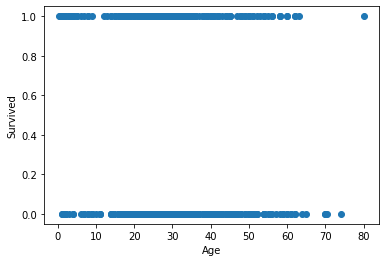

In [15]:
plt.scatter(X_train['Age'], y_train)
plt.xlabel('Age')
plt.ylabel('Survived')

plt.show()

\begin{align}
p  (y=1) = \frac{1}{1+e^{-(b_0+b_1x)}}
\end{align}


What we need for our model pipeline:

- `OneHotEncoder`
- `SimpleImputer`
- `LogisticRegression`

In [17]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression()
)

model.fit(X_train, y_train);

## V. Check Metrics

In [20]:
# default metric will be accuracy for classficiation when using the .score method (based on model)!
# Remember for Linear Regression mdoel we get r2 value instead!

print('Training Accuracy:', model.score(X_train, y_train))
print('Validation Accuracy:', model.score(X_val, y_val))

Training Accuracy: 0.8075842696629213
Validation Accuracy: 0.7988826815642458


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, model.predict(X_val))

0.7988826815642458

In [22]:
# predict method returns class predictions (Survived = 1, Not Survived = 0)

y_pred = model.predict(X_test)

In [24]:
y_pred[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [23]:
# predict_proba method returns Probability estimates.# Default Classification Threshold is 0.5

y_pred_proba = model.predict_proba(X_test)

In [25]:
y_pred_proba[:20]

array([[0.8874135 , 0.1125865 ],
       [0.60080629, 0.39919371],
       [0.83673078, 0.16326922],
       [0.89947394, 0.10052606],
       [0.44224222, 0.55775778],
       [0.8576075 , 0.1423925 ],
       [0.31948638, 0.68051362],
       [0.77946374, 0.22053626],
       [0.22089902, 0.77910098],
       [0.92701167, 0.07298833],
       [0.90632693, 0.09367307],
       [0.71511576, 0.28488424],
       [0.08697854, 0.91302146],
       [0.90549523, 0.09450477],
       [0.17420779, 0.82579221],
       [0.10799332, 0.89200668],
       [0.69151234, 0.30848766],
       [0.81987137, 0.18012863],
       [0.45008176, 0.54991824],
       [0.39125328, 0.60874672]])

In [26]:
## degree of certainity with which the model predicts the person survived (i.e 1) (for all our test samples)
# JUST GRAB THE LAST COLUMN VALUES 

y_pred_proba[:20, -1]

array([0.1125865 , 0.39919371, 0.16326922, 0.10052606, 0.55775778,
       0.1423925 , 0.68051362, 0.22053626, 0.77910098, 0.07298833,
       0.09367307, 0.28488424, 0.91302146, 0.09450477, 0.82579221,
       0.89200668, 0.30848766, 0.18012863, 0.54991824, 0.60874672])